In [541]:
import pandas as pd
import numpy as np
import matplotlib
import seaborn as sns
import matplotlib.dates as md
from matplotlib import pyplot as plt
from sklearn.ensemble import IsolationForest
import plotly
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly.graph_objs as go
import chart_studio.plotly as py
import matplotlib.pyplot as plt

In [542]:
#importing the data

dataframe=pd.read_csv(r"ambient_temperature_system_failure.csv")

#Exploring the data
print("dataframe :\n",dataframe)
print("dataframe info :\n",dataframe.info)
print("Description :\n",dataframe.describe())
print("Shape: row = {} , column= {} \n".format(dataframe.shape[0],dataframe.shape[1]))

#checking if the data is NA
dataframe.isna().sum()

#dropping the duplicate data if any
dataframe=dataframe.drop_duplicates(keep='first')

print("Description :\n",dataframe.describe())
print("Shape: row = {} , column= {} \n".format(dataframe.shape[0],dataframe.shape[1]))


dataframe :
                 timestamp      value
0     2013-07-04 00:00:00  69.880835
1     2013-07-04 01:00:00  71.220227
2     2013-07-04 02:00:00  70.877805
3     2013-07-04 03:00:00  68.959400
4     2013-07-04 04:00:00  69.283551
...                   ...        ...
7262  2014-05-28 11:00:00  72.370206
7263  2014-05-28 12:00:00  72.172956
7264  2014-05-28 13:00:00  72.046565
7265  2014-05-28 14:00:00  71.825226
7266  2014-05-28 15:00:00  72.584089

[7267 rows x 2 columns]
dataframe info :
 <bound method DataFrame.info of                 timestamp      value
0     2013-07-04 00:00:00  69.880835
1     2013-07-04 01:00:00  71.220227
2     2013-07-04 02:00:00  70.877805
3     2013-07-04 03:00:00  68.959400
4     2013-07-04 04:00:00  69.283551
...                   ...        ...
7262  2014-05-28 11:00:00  72.370206
7263  2014-05-28 12:00:00  72.172956
7264  2014-05-28 13:00:00  72.046565
7265  2014-05-28 14:00:00  71.825226
7266  2014-05-28 15:00:00  72.584089

[7267 rows x 2 columns]

<AxesSubplot:ylabel='Frequency'>

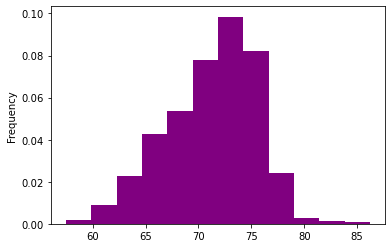

In [543]:
dataframe.value.plot.hist(bins=12,density=True,color='purple')

In [544]:
#Converting the date

dataframe['timestamp'] = pd.to_datetime(dataframe['timestamp'])
dataframe.head()


,timestamp,value
0,2013-07-04 00:00:00,69.880835
1,2013-07-04 01:00:00,71.220227
2,2013-07-04 02:00:00,70.877805
3,2013-07-04 03:00:00,68.959400
4,2013-07-04 04:00:00,69.283551


<AxesSubplot:xlabel='timestamp'>

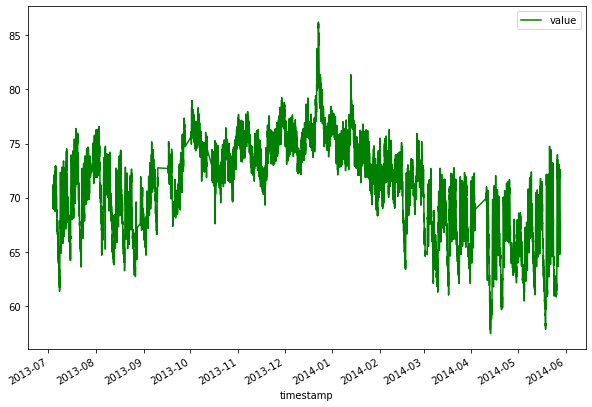

In [545]:
dataframe.plot(x='timestamp',y='value',figsize=(10,7),color="green")

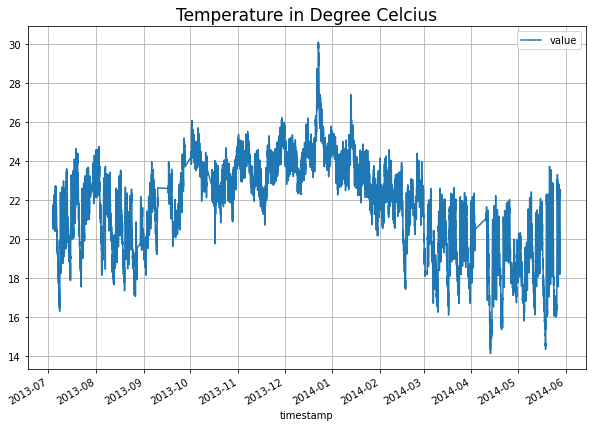

<AxesSubplot:ylabel='Frequency'>

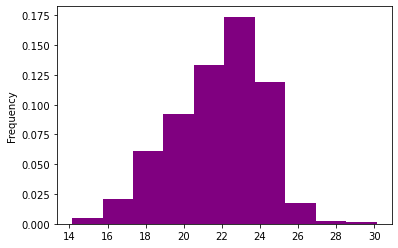

In [546]:
#Feature engineering (Extracting features in order to gain deeper knowledge)
dataframe['Year'] = dataframe['timestamp'].dt.year
dataframe['Month'] = dataframe['timestamp'].dt.month
dataframe['Day'] = dataframe['timestamp'].dt.day
dataframe['Hours'] = dataframe['timestamp'].dt.hour
dataframe['Day_Of_Week'] = dataframe['timestamp'].dt.dayofweek
#converting temperature to celcius
dataframe["value"]=(dataframe['value'] - 32) * 5/9
#Checking if it is daylight or night
dataframe['daylight'] = ((dataframe['Hours'] >= 7) & (dataframe['Hours'] <= 22)).astype(int)
dataframe.plot(x='timestamp', y='value', figsize=(10,7));
plt.title('Temperature in Degree Celcius', fontsize=17);
plt.grid();
plt.show();
dataframe.head(20)
dataframe.value.plot.hist(bins=10,density=True,color='purple')


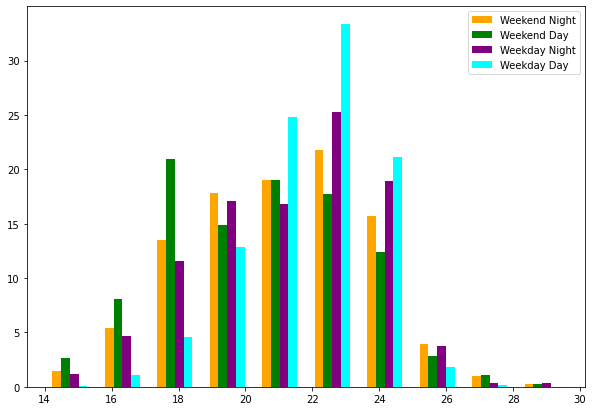

,timestamp,value,Year,Month,Day,Hours,Day_Of_Week,daylight,WeekDay,category
0,2013-07-04 00:00:00,21.044908,2013,7,4,0,3,0,1,2
1,2013-07-04 01:00:00,21.789015,2013,7,4,1,3,0,1,2
2,2013-07-04 02:00:00,21.598781,2013,7,4,2,3,0,1,2
3,2013-07-04 03:00:00,20.533000,2013,7,4,3,3,0,1,2
4,2013-07-04 04:00:00,20.713084,2013,7,4,4,3,0,1,2


In [547]:
dataframe['WeekDay'] = (dataframe['Day_Of_Week'] < 5).astype(int)

# Anomaly estimated population
outliers_fraction = 0.01
dataframe['category'] = dataframe['WeekDay']*2 + dataframe['daylight']
a = dataframe.loc[dataframe['category'] == 0, 'value']
b = dataframe.loc[dataframe['category'] == 1, 'value']
c = dataframe.loc[dataframe['category'] == 2, 'value']
d = dataframe.loc[dataframe['category'] == 3, 'value']

#Visualizing the formatted data
fig, ax = plt.subplots(figsize=(10,7))
a_heights, a_bins = np.histogram(a)
b_heights, b_bins = np.histogram(b, bins=a_bins)
c_heights, c_bins = np.histogram(c, bins=a_bins)
d_heights, d_bins = np.histogram(d, bins=a_bins)
width = (a_bins[1] - a_bins[0])/6
ax.bar(a_bins[:-1], a_heights*100/a.count(), width=width, facecolor='orange', label='Weekend Night')
ax.bar(b_bins[:-1]+width, (b_heights*100/b.count()), width=width, facecolor='green', label ='Weekend Day')
ax.bar(c_bins[:-1]+width*2, (c_heights*100/c.count()), width=width, facecolor='purple', label ='Weekday Night')
ax.bar(d_bins[:-1]+width*3, (d_heights*100/d.count()), width=width, facecolor='cyan', label ='Weekday Day')
plt.legend()
plt.show()
dataframe.head()

In [548]:
#analysing month data
dataframe['Month'].value_counts()

12    744
1     744
11    720
3     699
8     697
2     672
5     664
10    662
7     640
4     547
9     478
Name: Month, dtype: int64

In [549]:
#analysing different columns

for col in dataframe.columns:
    if col!="timestamp" and col!="value":
        print("{} : \n{}".format(col,dataframe[col].value_counts()))

Year : 
2013    3941
2014    3326
Name: Year, dtype: int64
Month : 
12    744
1     744
11    720
3     699
8     697
2     672
5     664
10    662
7     640
4     547
9     478
Name: Month, dtype: int64
Day : 
19    264
17    264
26    264
25    264
23    264
22    264
21    264
20    264
18    262
16    252
24    250
27    241
5     240
4     240
15    240
8     240
6     240
7     240
11    237
9     237
1     228
10    225
14    221
2     220
3     217
12    216
13    216
30    192
28    188
29    169
31    144
Name: Day, dtype: int64
Hours : 
20    305
19    305
0     304
1     304
15    304
12    304
23    303
16    303
22    303
21    303
2     303
3     303
18    303
13    303
14    303
17    303
4     302
11    302
9     302
7     301
5     301
10    301
8     301
6     301
Name: Hours, dtype: int64
Day_Of_Week : 
4    1066
3    1064
1    1054
2    1048
5    1032
0    1011
6     992
Name: Day_Of_Week, dtype: int64
daylight : 
1    4846
0    2421
Name: daylight, dtype: int64
We

In [550]:
#finding maximum and minimum temperatures:
#we can see the months which had max or min
maxtemp="Max temp: ",dataframe["value"].max()
print(maxtemp)
mintemp="Minimum temp:",dataframe["value"].min()
print(mintemp)

('Max temp: ', 30.12400700555556)
('Minimum temp:', 14.14355866111111)


<AxesSubplot:>

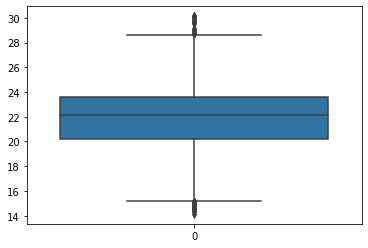

In [551]:
#box plot in order to gain more knowledge about distibution of data
sns.boxplot(data=dataframe.value)

In [552]:
#3) Statistical model - Zscore for anomaly detection 
meanofdata = dataframe["value"].mean(axis=0)
standard = dataframe["value"].std(axis=0)
print('mean of the dataset is', meanofdata)
print('std. deviation is', standard)

mean of the dataset is 21.801351504604487
std. deviation is 2.3597274529157497


In [553]:
#Any z-score greater than 3 or less than -3 is considered to be an outlier.
thresholdmax,thresholdmin = 3,-3
outlier = []
for val in dataframe["value"]:
    z = (val-meanofdata)/standard
    if z > threshold or z<thresholdmin:
        outlier.append(val)
print('outlier in dataset is', outlier)
print('Number of Outliers is :', len(outlier))

outlier in dataset is [29.10607335, 29.570936366666665, 30.0527158, 30.113438455555556, 30.12400700555556, 29.805242983333333, 30.041505488888887, 29.625647461111114, 29.83666131111111, 28.937205872222226, 29.567931638888883, 29.07166663888889, 14.358096177777778, 14.660845355555555, 14.14355866111111, 14.574249966666665, 14.533523488888891, 14.679799194444444, 14.36772538888889]
Number of Outliers is : 19


In [554]:
#Range of timeframe
print(dataframe['timestamp'].min())
print(dataframe['timestamp'].max())
print(len(dataframe['timestamp']))

2013-07-04 00:00:00
2014-05-28 15:00:00
7267


In [555]:
# 4) ML model : Unsupervised learning method - Using Isolation Forest to detect anomalies
data = dataframe[['value', 'Hours', 'Year', 'Month', 'Day_Of_Week']]
min_max_scaler = preprocessing.StandardScaler()
np_scaled = min_max_scaler.fit_transform(data)
data = pd.DataFrame(np_scaled)
# train isolation forest 
model =  IsolationForest(n_estimators=10, max_samples='auto',contamination=float(0.01)\
                        ,max_features=1.0, bootstrap=False, n_jobs=-1, random_state=42, verbose=0)
model.fit(data)
# add the data to the main  
dataframe['anomaly'] = pd.Series(model.predict(data))
dataframe['anomaly'] = dataframe['anomaly'].map( {1: 0, -1: 1} )
print(dataframe['anomaly'].value_counts())
dataframe['scores']=clf.decision_function(dataframe[['value']])

0    7195
1      72
Name: anomaly, dtype: int64


In [556]:
def anomaly_plot(df):
    df.timestamp = pd.to_datetime(df['timestamp'].astype(str), format="%Y-%m-%d %H:%M:%S")
    dates = df.timestamp
    #Identifying the anomalies
    bool_array = (abs(df['anomaly']) > 0)
    actuals = df["value"][-len(bool_array):]
    anomaly_points = bool_array * actuals
    anomaly_points[anomaly_points == 0] = np.nan
    #Ploting the points
    normal = go.Scatter(name='Temperature values', x=dates, y=df['value'], xaxis='x1', yaxis='y1', mode='lines',
                         marker=dict(size=12,
                                 line=dict(width=1),
                                 color="green"))
    #Anomaly Points
    map_of_anomalies = go.Scatter(name="Anomalies",showlegend=True,x=dates,y=anomaly_points, mode='markers', xaxis='x1', yaxis='y1',  marker=dict(color="red",size=11,
                                    line=dict(color="red",
                                               width=2)))
    axis = dict(showline=True,zeroline=False, showgrid=True,mirror=True,ticklen=4,tickfont=dict(size=10))
    layout = dict(width=900,height=800,autosize=False,title='Anomalies',margin=dict(t=60),showlegend=True,xaxis1=dict(axis, **dict(domain=[0, 1], anchor='y1', showticklabels=True)),yaxis1=dict(axis, **dict(domain=[2 * 0.21 + 0.20, 1], anchor='x1', hoverformat='.3f')))
    figure = go.Figure(data=[map_of_anomalies, normal], layout=layout)
    iplot(figure)
    pyplot.show()
anomaly_plot(dataframe)

In [557]:
print("Percentage of anomalies in data: {:.3f}".format((len(dataframe.loc[dataframe['anomaly']==1])/len(dataframe))*100))

Percentage of anomalies in data: 0.991


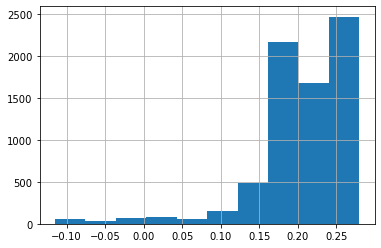

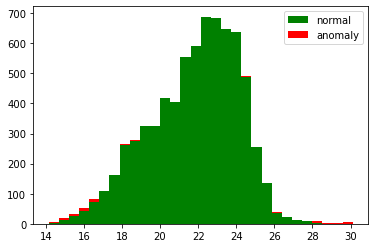

In [558]:
dataframe['scores'].hist(label="Anomalies")
a = dataframe.loc[dataframe['anomaly'] == 0, 'value']
b = dataframe.loc[dataframe['anomaly'] == 1, 'value']

figure, axs = plt.subplots()
axs.hist([a,b], bins=30, stacked=True, color=['green', 'red'], label = ['normal', 'anomaly'])
plt.legend()
plt.show()

In [559]:
dataframe.loc[:,["timestamp","value"]].loc[dataframe['anomaly']==1]

,timestamp,value
96,2013-07-08 00:00:00,16.933769
97,2013-07-08 01:00:00,16.683641
99,2013-07-08 03:00:00,16.502839
100,2013-07-08 04:00:00,17.097300
101,2013-07-08 05:00:00,16.313598
...,...,...
7037,2014-05-19 02:00:00,14.799608
7038,2014-05-19 03:00:00,15.041495
7204,2014-05-26 01:00:00,16.537700
7205,2014-05-26 02:00:00,16.190610
